In [16]:
# Recall : autoencoder is trained to Minimize Reconstruction Error
# You will train an autoencoder on the normal rhythms only,
# Then use it to reconstruct all the data

# 載入心電圖 : Load ECG data (Electrocardiograms)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
print(dataframe.head())

# 心電圖csv最後一欄是label : 0 = 不正常 abnormal rhythm, 1 = 正常 normal rhythm
labels = raw_data[:, -1]

# 其他欄位是心電特徵
data = raw_data[:, 0:-1]

# Part I . Data PreProcessing
# 分割數據成訓練集，測試集
X_train, X_test, Y_train, Y_test = train_test_split(
    data, labels, test_size = 0.2, random_state = 21
)

        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.2577

In [17]:
MNScaler = MinMaxScaler()
X_train = MNScaler.fit_transform(X_train) # 先學習train的歸一化特徵(Min,Max)，再對train進行歸一化
X_test = MNScaler.transform(X_test) # 因為已經學習train的歸一化特徵，所以用同樣(模型)的標準對test歸一化



In [18]:
# 在訓練AutoEncoder時只使用正常訊號 -> 將label = 1 -> True的資料取出
Y_train = Y_train.astype(bool) # 標籤形成布林值矩陣
Y_test = Y_test.astype(bool)
print(Y_train)

normal_X_train = X_train[Y_train] # 布林值為True的值會被提出來->正常心電圖數據(np.array)
normal_X_test = X_test[Y_test]

anomalous_X_train = X_train[~Y_train]
anomalous_X_test = X_test[~Y_test]

[ True  True  True ...  True  True  True]


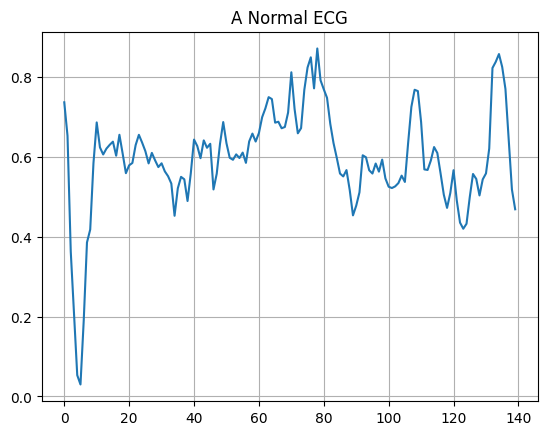

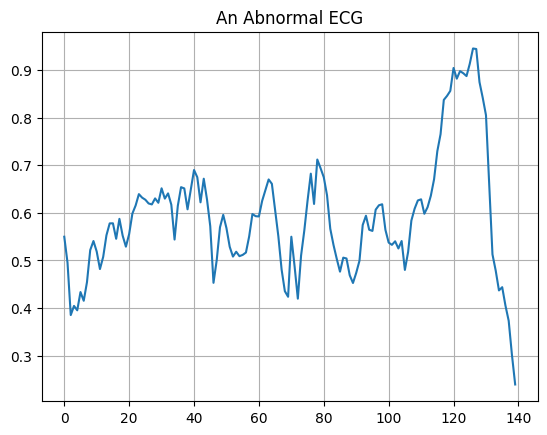

In [20]:
# 劃出正常的心電圖 Plot a normal ECG
plt.grid()
plt.plot(np.arange(140), normal_X_train[0])
plt.title("A Normal ECG")
plt.show()

# 劃出異常的心電圖 Plot an abnormal ECG
plt.grid()
plt.plot(np.arange(140), anomalous_X_train[0])
plt.title("An Abnormal ECG")
plt.show()